In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def directionalToAniso(directionalTable, direction):
    
    dirTable = directionalTable.copy()
    AnisoTable = pd.DataFrame(columns=["Dp", "S", "Kr"])
    AnisoTable.Dp = dirTable.Dp
    AnisoTable.S = dirTable.Sw
    
    if direction == 0:
        AnisoTable.Kr = dirTable.Krxx
    elif direction == 1:
        AnisoTable.Kr = dirTable.Kryy
    elif direction == 2:
        AnisoTable.Kr = dirTable.Krzz
    
    return AnisoTable

In [3]:
result_filepath="/home/lezin/OPM/results/"
data_filepath="/home/lezin/OPM/dataset/"

for i in range(6, 14):

    case = "CASE" + str(i)

    analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
    input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])
    sim_mock_krw = pd.read_csv(result_filepath + case + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
    sim_mock_kro = pd.read_csv(result_filepath + case + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
    
    capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
    flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
    Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
    L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
    sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
    
    
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.plot(analytical_solution.Sw, analytical_solution.Krw)
    ax.plot(input_curve.Sw, input_curve.Krw)

    pressureDropKr = directionalToAniso(sim_mock_krw, flow_direction).copy()
    p = 0

    for press in pressureDropKr.Dp.unique():

        pressureDrop = pressureDropKr[pressureDropKr.Dp == press]
        ax.scatter(pressureDrop.S, pressureDrop.Kr, color=[p, 1-p, p], label="C=" + str(Kt*press/(sigma*L)))
        p += 1/len(pressureDropKr.Dp.unique())
    ax.legend()
    plt.title(case + ": Water relperm - flow direction=" + str(flow_direction))
    
    #fig, ax = plt.subplots(figsize=(10, 10))

    #ax.plot(analytical_solution.Sw, analytical_solution.Kro)
    #ax.plot(input_curve.Sw, input_curve.Kro)

    #pressureDropKr = directionalToAniso(sim_mock_kro, flow_direction).copy()

    #p=0
    #for press in pressureDropKr.Dp.unique():

    #   pressureDrop = pressureDropKr[pressureDropKr.Dp == press]

     #   ax.scatter(pressureDrop.S, pressureDrop.Kr, color=[p, 1-p, p], label="C=" + str(Kt*press/(sigma*L)))
     #   p += 1/len(pressureDropKr.Dp.unique())
    #ax.legend()
    #plt.title(case + ": Oil relperm - flow direction=" + str(flow_direction))

(0.0, 0.15)

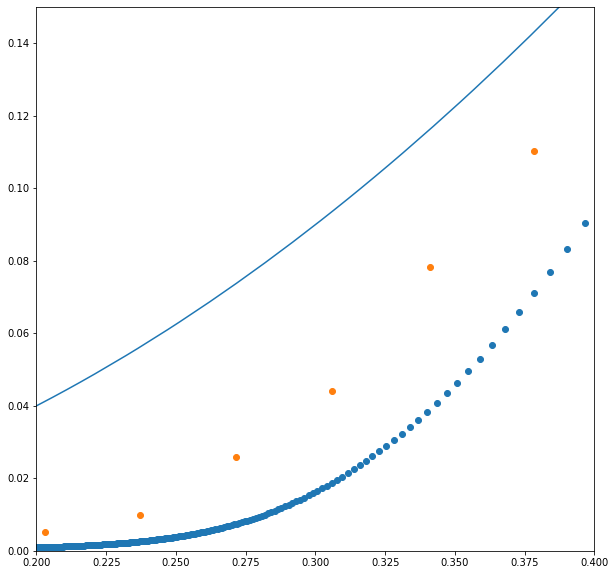

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

analytical_solution = pd.read_csv(data_filepath + "CASE10" + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + "CASE10"  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + "CASE10"  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])

ax.scatter(analytical_solution.Sw, analytical_solution.Krw)
ax.plot(input_curve.Sw, input_curve.Krw)
ax.scatter(sim_mock_krw.Sw, sim_mock_krw.Krxx)

ax.set_xlim(0.2, 0.4)
ax.set_ylim(0.0, 0.15)

fig, ax = plt.subplots(figsize=(20, 10))
p=0
for i in range(2, 8):

    case = "CASE" + str(i)

    analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
    capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
    ratio = float(capillary_params.Value[capillary_params.Param == "Thickness ratio"])
    
    ax.plot(analytical_solution.Sw, analytical_solution.Krw, color=[p, 1- p, p*(1 - p)], label="Ratio=" + str(ratio))
    ax.legend()
    plt.title("Analytical upscaled water relperm - Parallel flow")
    p += 1/5

fig, ax = plt.subplots(figsize=(20, 10))
p=0
for i in range(8, 15):

    case = "CASE" + str(i)

    analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
    capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
    ratio = float(capillary_params.Value[capillary_params.Param == "Thickness ratio"])
    
    ax.plot(analytical_solution.Sw, analytical_solution.Krw, color=[p, 1- p, p*(1 - p)], label="Ratio=" + str(ratio))
    ax.legend()
    plt.title("Analytical upscaled water relperm - Normal flow")
    p += 1/6

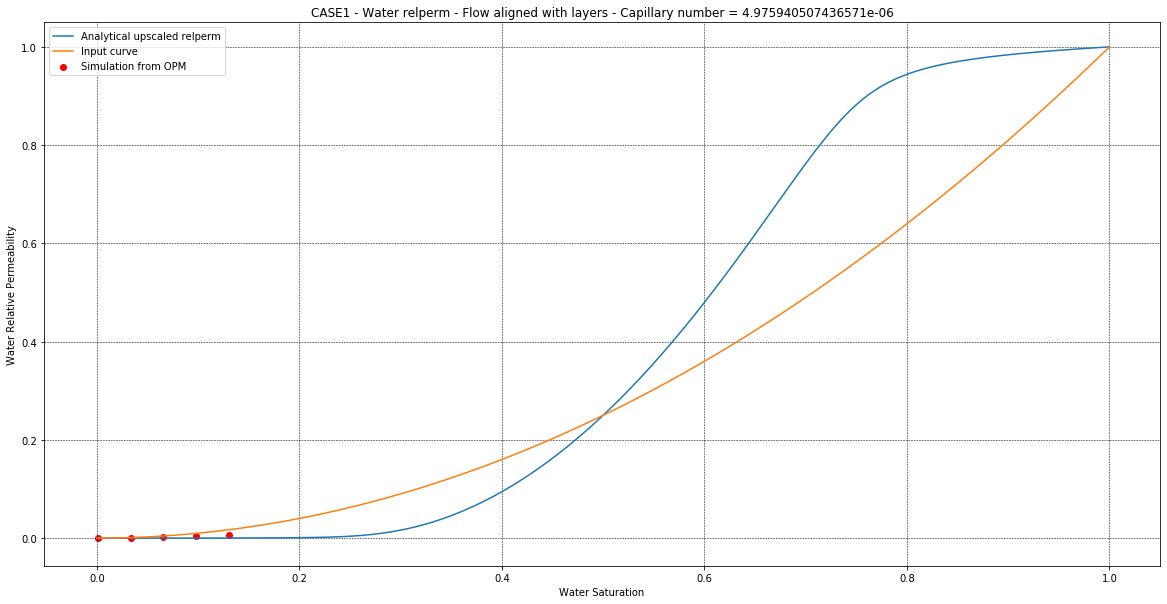

In [12]:
case = "CASE1"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])
    
capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)

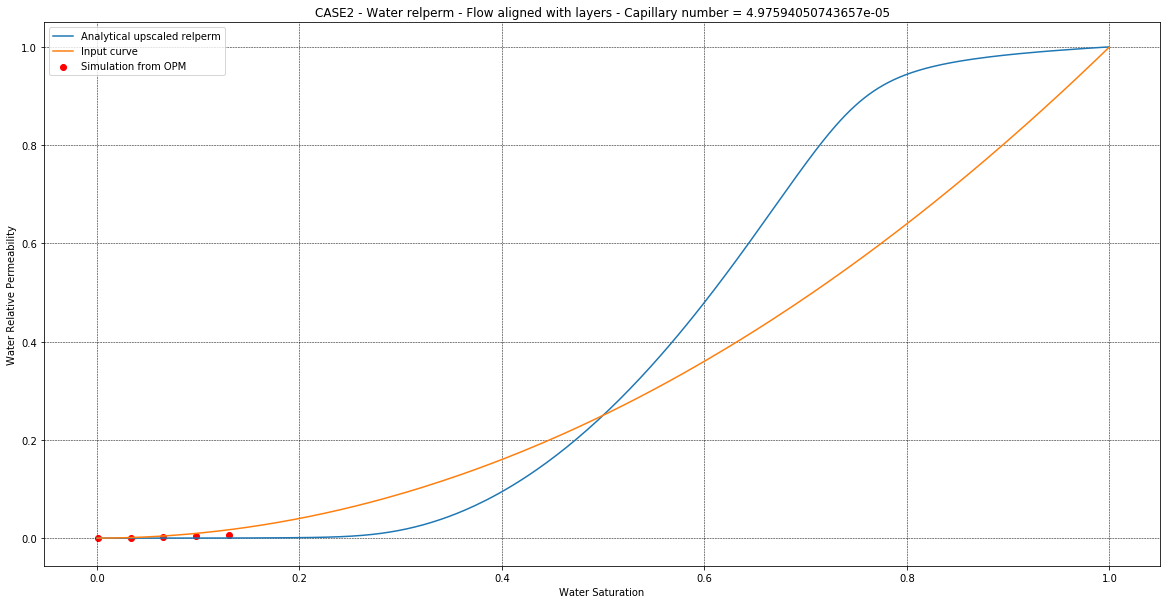

In [13]:
case = "CASE2"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])
    
capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)

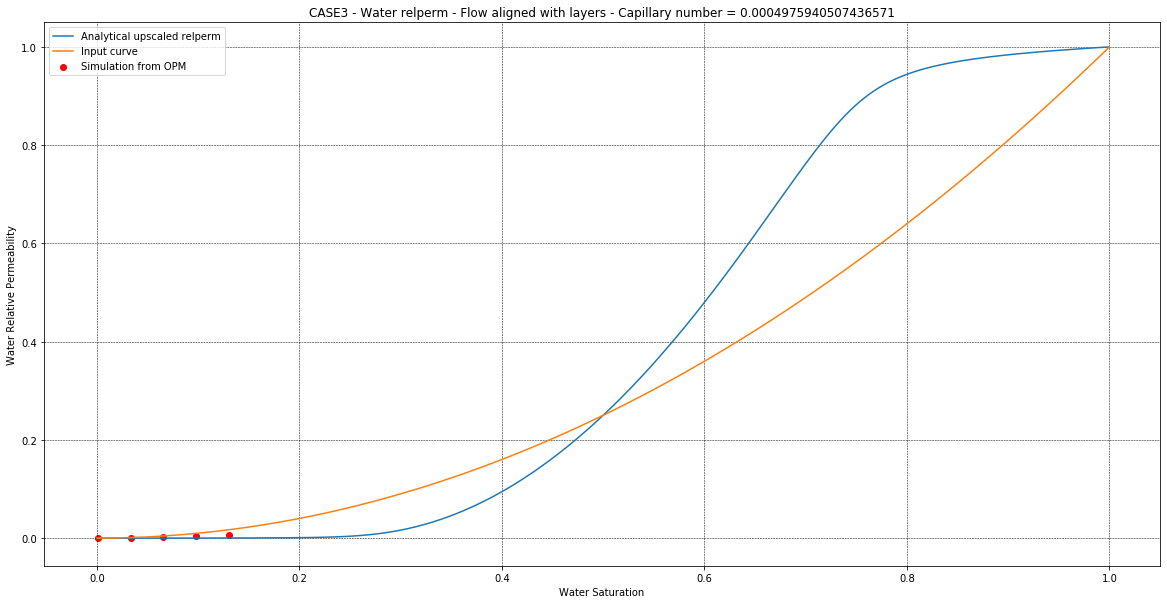

In [14]:
case = "CASE3"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])
    
capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)

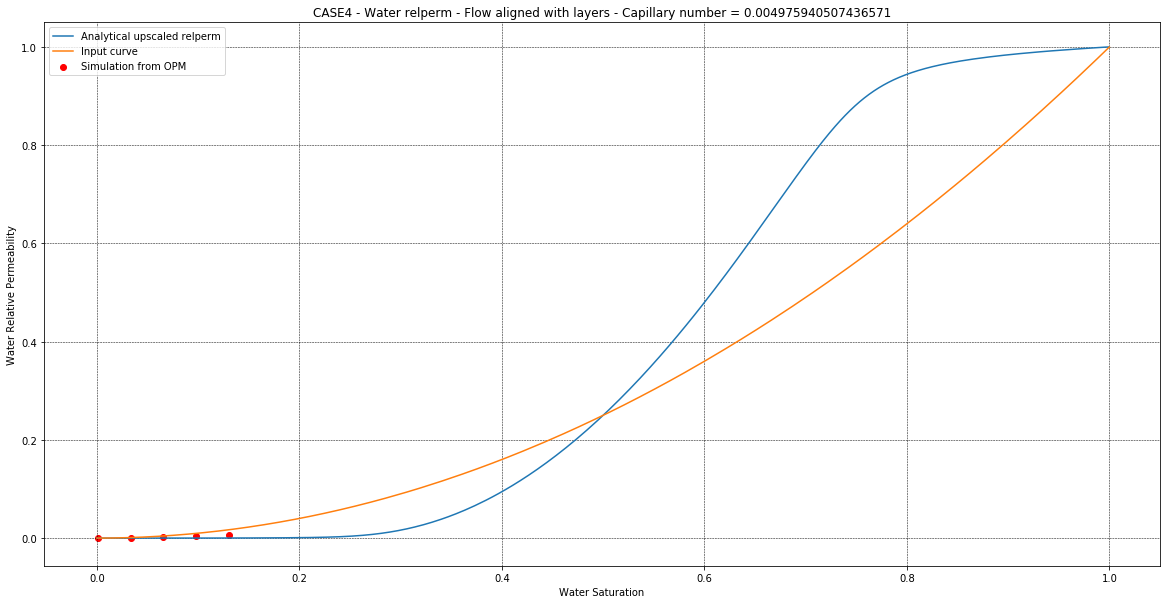

In [15]:
case = "CASE4"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])

capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)

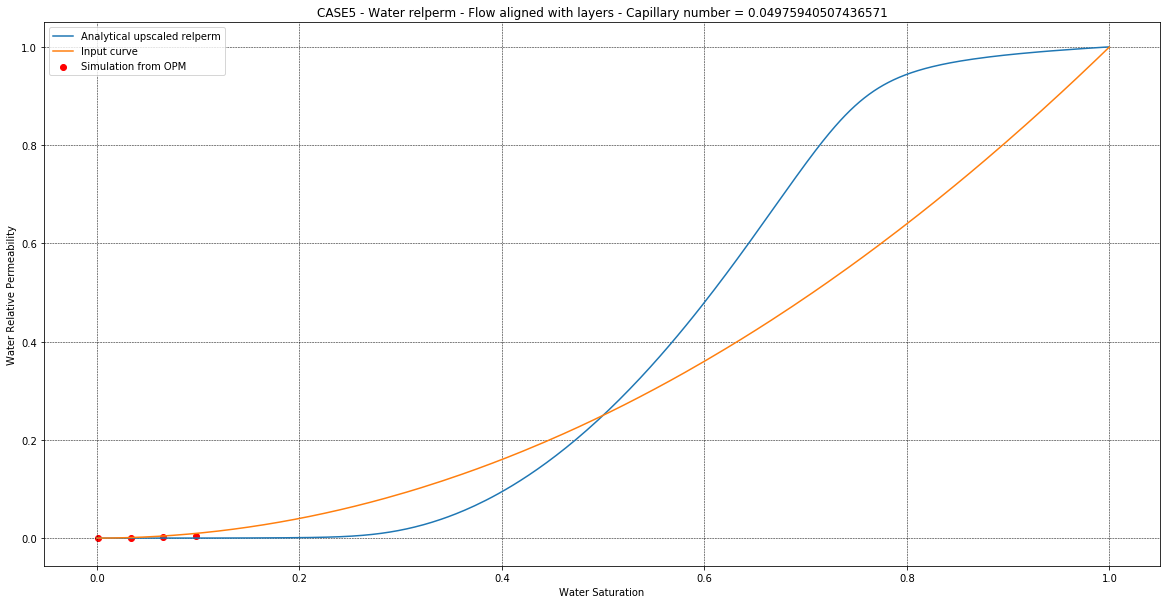

In [16]:
case = "CASE5"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])

capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)

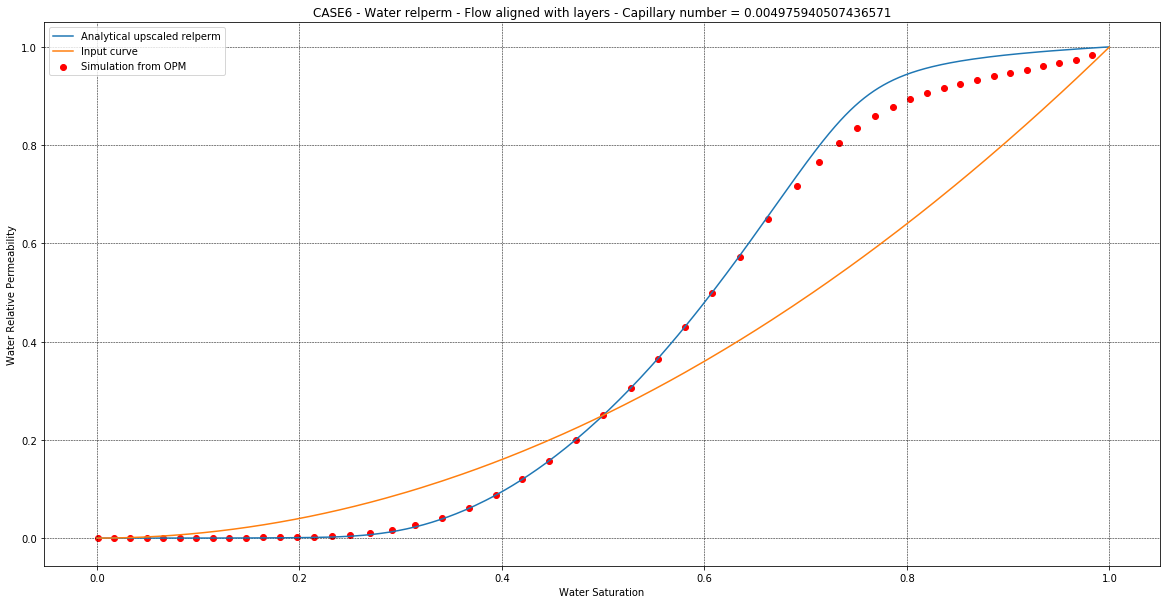

In [17]:
case = "CASE6"

analytical_solution = pd.read_csv(data_filepath + case + "/" + "analytical_relperms",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "Pc"])
sim_mock_krw = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_water",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
sim_mock_kro = pd.read_csv(result_filepath + case  + "/" + "kr_relperm_oil",
                               header=None, skiprows=2, sep="\t", usecols=[0, 1, 2, 3, 4],
                               names=["Dp", "Sw", "Krxx", "Kryy", "Krzz"])
input_curve = pd.read_csv(data_filepath + case + "/" + "rocktypes/rock1.txt",
                               header=None, skiprows=2, sep="\t",
                               names=["Sw", "Krw", "Kro", "J"])

capillary_params = pd.read_csv(data_filepath + case + "/" + "capillary_number.params",
                               header=None, sep="\t", usecols=[0, 1],
                               names=["Param", "Value"])
    
flow_direction = int(capillary_params.Value[capillary_params.Param == "Flow direction"])
Kt = float(capillary_params.Value[capillary_params.Param == "Kt"])*1E-15
L = float(capillary_params.Value[capillary_params.Param == "L"])*0.3048
sigma = float(capillary_params.Value[capillary_params.Param == "Sigma"])
Dp = sim_mock_krw.Dp[0]

C = Kt*Dp/(L*sigma)
    
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(analytical_solution.Sw, analytical_solution.Krw, label="Analytical upscaled relperm")
ax.plot(input_curve.Sw, input_curve.Krw, label="Input curve")
ax.scatter(sim_mock_kro.Sw, sim_mock_krw.Krxx, color="red", label="Simulation from OPM")
ax.legend()
plt.title(case + " - Water relperm - Flow aligned with layers - Capillary number = " + str(C))
plt.xlabel("Water Saturation")
plt.ylabel("Water Relative Permeability")
ax.grid(color='k', linestyle='--', linewidth=0.5)